In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
dataset=pd.read_csv(r"C:\Users\samru\OneDrive\Documents\tested.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
dataset.info()
#sex,embarked,name,cabin,ticket>>strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#null values 
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#inconsistent data
dataset.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

<Axes: xlabel='Age'>

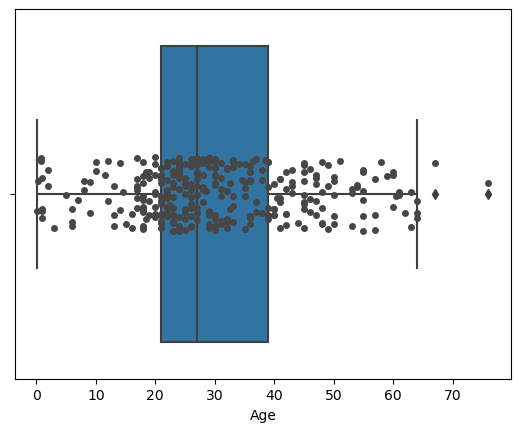

In [10]:
#outliers 
sns.boxplot(x='Age',data=dataset)
sns.stripplot(x='Age',data=dataset,color='#474646')
#outliers above 55

In [11]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

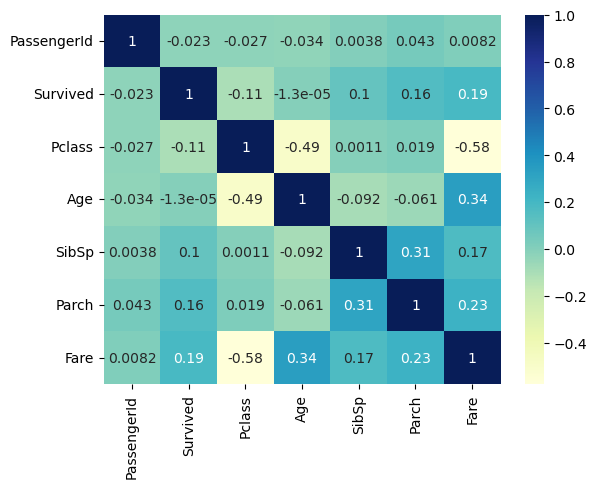

In [13]:
sns.heatmap(dataset.corr(numeric_only=True) , cmap="YlGnBu",annot=True)
plt.show()

In [14]:
#replace null values by mean 
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
dataset['Fare'] = dataset['Fare'].astype(int)
dataset['Age'] = dataset['Age'].astype(int)
dataset.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Cabin          object
Embarked       object
dtype: object

In [16]:
Embarked = dataset['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> Q
-> S
-> C


In [17]:
dataset['Embarked'] = dataset['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)
dataset['Sex'] = dataset['Sex'].map( {'female': 1,'male':0}).astype(int)
dataset.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex             int32
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Cabin          object
Embarked        int32
dtype: object

In [18]:
data = dataset.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30,0,0,8,1
414,1,1,1,39,0,0,108,2
415,0,3,0,38,0,0,7,1
416,0,3,0,30,0,0,8,1


In [19]:
dataset.shape

(418, 8)

<Axes: xlabel='Survived', ylabel='count'>

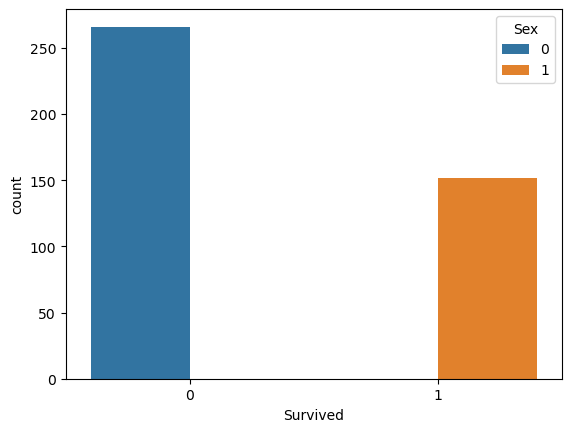

In [20]:
#count number of males and females with survived
#1=survived,
#0=died
sns.countplot(x='Survived',hue='Sex',data=dataset)
#hue='Sex',
#number of died> survived

<Axes: xlabel='Pclass', ylabel='count'>

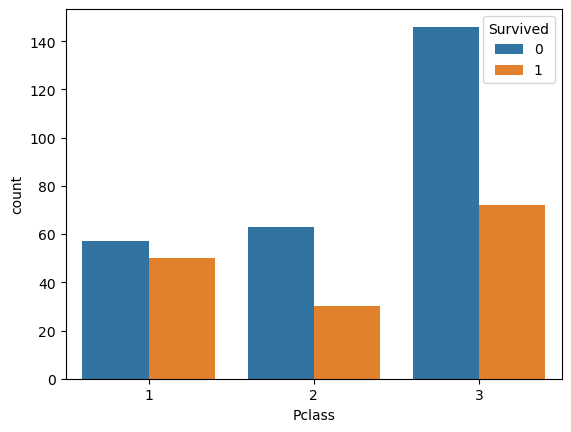

In [21]:
sns.countplot(x='Pclass',hue='Survived',data=dataset)

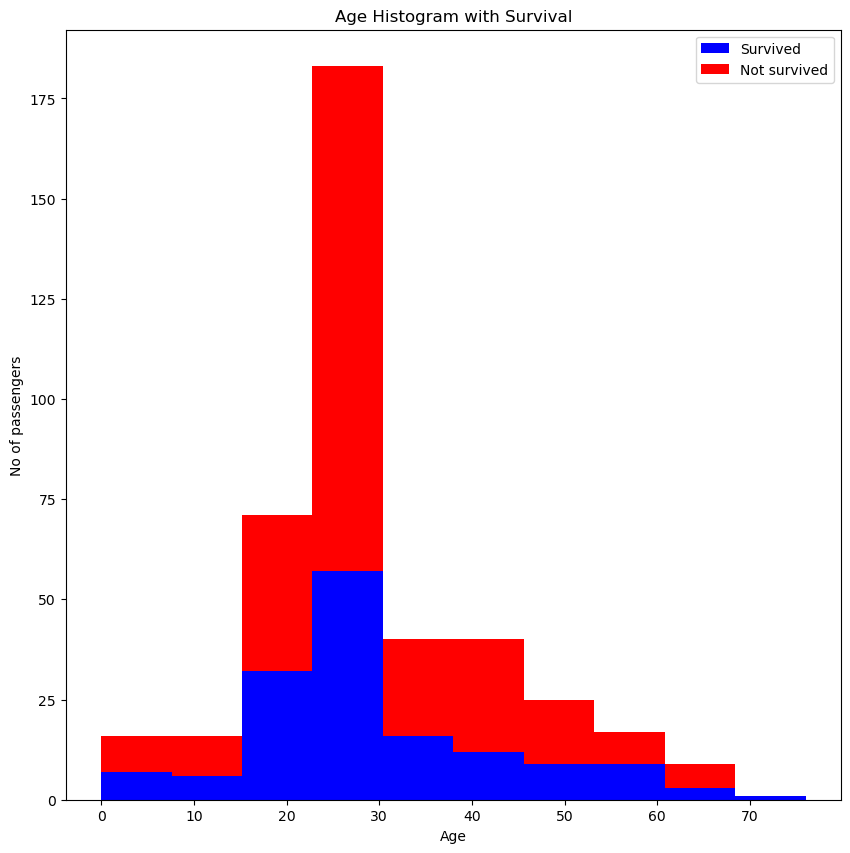

In [22]:
fig = plt.figure(figsize =(10, 10))
plt.hist(x = [dataset[dataset['Survived']==1]['Age'], dataset[dataset['Survived']==0]['Age']],stacked=True, color = ['b','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

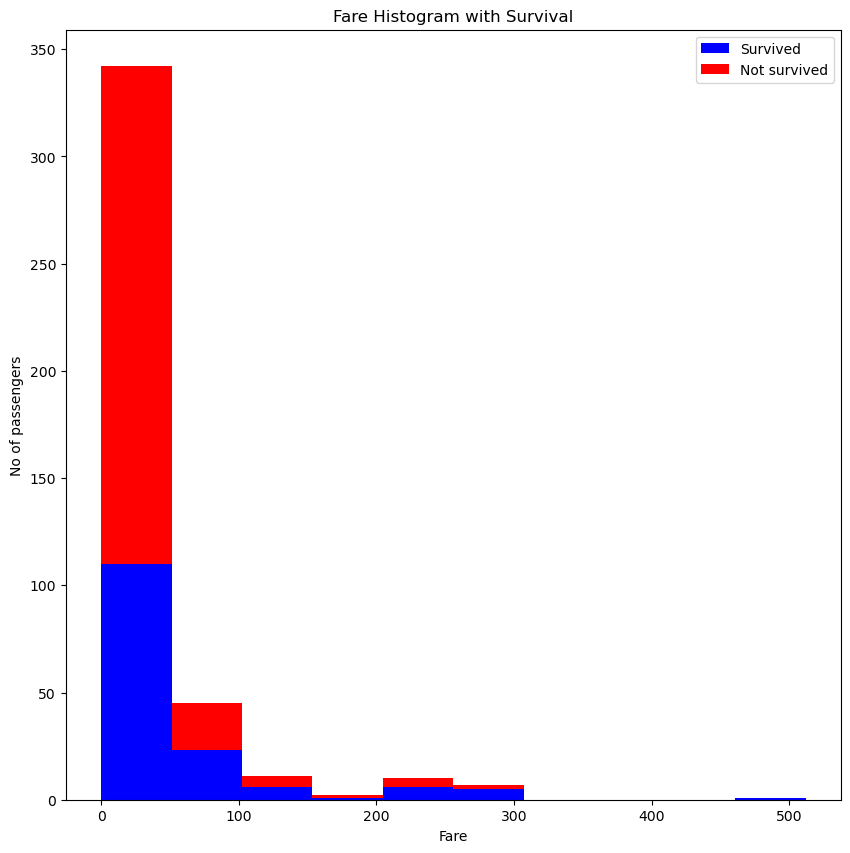

In [23]:
fig = plt.figure(figsize =(10, 10))
plt.hist(x = [dataset[dataset['Survived']==1]['Fare'], dataset[dataset['Survived']==0]['Fare']], stacked=True, color = ['b','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

In [24]:
#split data
Train = dataset.drop(['Survived'], axis=1)
Test = dataset['Survived']
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.7, random_state = 1)

In [25]:
Logistic_Regression = LogisticRegression(solver='liblinear', max_iter=200)
Logistic_Regression.fit(x_train, y_train)
y_pred = Logistic_Regression.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('accuracy: {:.2f}%'.format(LRAcc*100))

accuracy: 100.00%


In [26]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1
...,...,...,...,...,...,...,...,...
413,0,3,0,30,0,0,8,1
414,1,1,1,39,0,0,108,2
415,0,3,0,38,0,0,7,1
416,0,3,0,30,0,0,8,1


In [27]:
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64